In [1]:
import numpy as np
import pandas as pd

In [2]:
original_data = pd.read_csv("adult.data",names=["Age","Workplace",
                                                "trilwgt","Education_Num","Maritial Status",
                                                "Occupation","Relationship","Race","Gender","CaptialGain",
                                                "Capital Loss","Horse per week","Country","Target"])

In [3]:
original_data.head()

,Age,Workplace,trilwgt,Education_Num,Maritial Status,Occupation,Relationship,Race,Gender,CaptialGain,Capital Loss,Horse per week,Country,Target
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

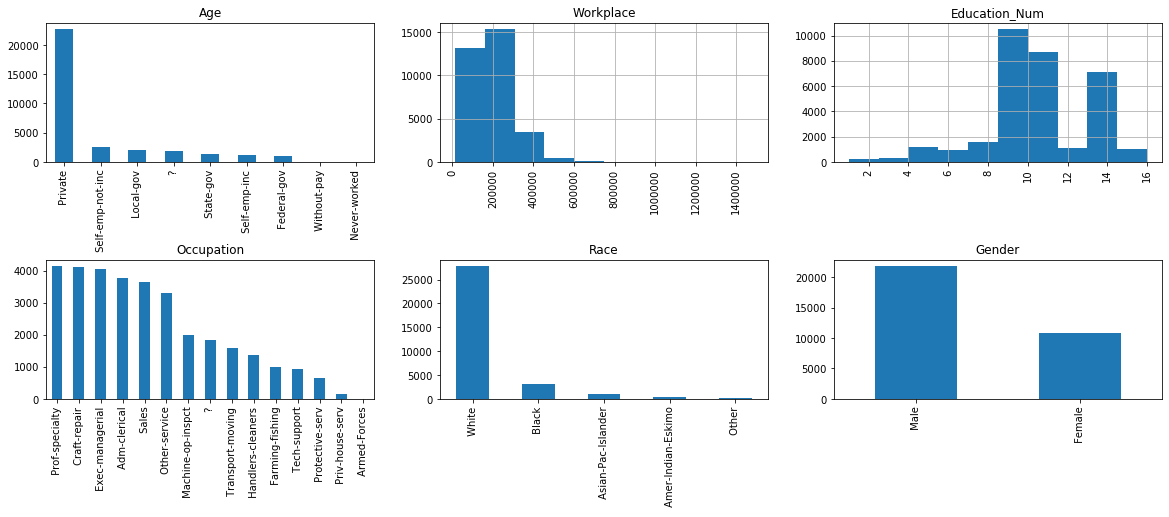

In [10]:
fig = plt.figure(figsize=(20,20))
cols = 3
rows = math.ceil(float(original_data.shape[1])/cols)
for i , columns in enumerate(["Age","Workplace","Education_Num","Occupation","Race","Gender"]):
    ax = fig.add_subplot(rows,cols,i+1)
    ax.set_title(columns)
    if original_data.dtypes[columns]==np.object:
        original_data[columns].value_counts().plot(kind="bar",axes=ax)
    else:
        original_data[columns].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()

In [14]:
#Use LabelEncoder to transform text to number
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

In [16]:
original_data['Occupation'] = le.fit_transform(original_data['Occupation'].astype(str))
original_data.head()

,Age,Workplace,trilwgt,Education_Num,Maritial Status,Occupation,Relationship,Race,Gender,CaptialGain,Capital Loss,Horse per week,Country,Target
39,State-gov,77516,Bachelors,13,Never-married,1,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,9,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,11,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,11,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,2,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
original_data['Target'] = le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workplace,trilwgt,Education_Num,Maritial Status,Occupation,Relationship,Race,Gender,CaptialGain,Capital Loss,Horse per week,Country,Target
27,Private,257302,Assoc-acdm,12,Married-civ-spouse,5,Wife,White,Female,0,0,38,United-States,0
40,Private,154374,HS-grad,9,Married-civ-spouse,12,Husband,White,Male,0,0,40,United-States,1
58,Private,151910,HS-grad,9,Widowed,1,Unmarried,White,Female,0,0,40,United-States,0
22,Private,201490,HS-grad,9,Never-married,1,Own-child,White,Male,0,0,20,United-States,0
52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,9,Wife,White,Female,15024,0,40,United-States,1


In [18]:
original_data.Target.unique()

array([0, 1])

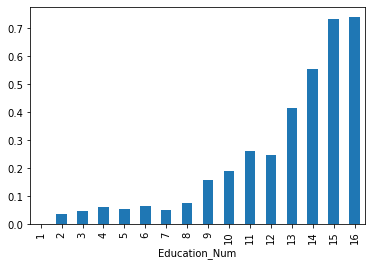

In [20]:
original_data.groupby('Education_Num').Target.mean().plot(kind="bar")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
X = original_data[['Education_Num','Occupation']]
y = original_data['Target']

In [25]:
X_train, X_test,Y_train ,Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
print(X_train.shape,Y_train.shape)

(26048, 2) (26048,)


In [34]:
from sklearn.svm import SVC
model = SVC()

In [35]:
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
score = model.score(X_test,Y_test)

In [37]:
print(score)

0.7845846768002457


In [40]:
#corelation matrix
import seaborn as sns

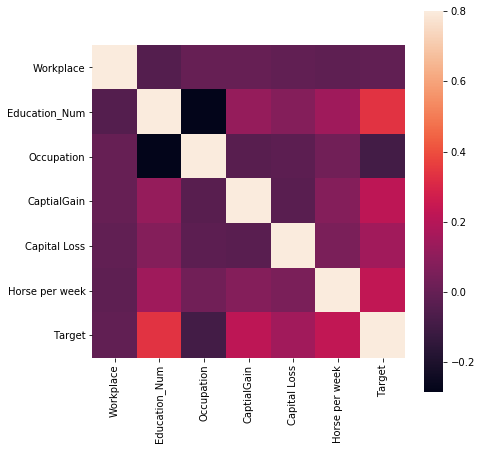

In [43]:
corrmat = original_data.corr()
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True);
plt.show()

In [54]:
#convert potential relavent fields to have numeric
original_data['Race'] = le.fit_transform(original_data['Race'].astype(str))
original_data['Gender'] = le.fit_transform(original_data['Gender'].astype(str))
original_data['Maritial Status'] = le.fit_transform(original_data['Maritial Status'].astype(str))
original_data['Educations'] = le.fit_transform(original_data['Education_Num'].astype(str))
original_data['Age'] = le.fit_transform(original_data['Age'].astype(str))

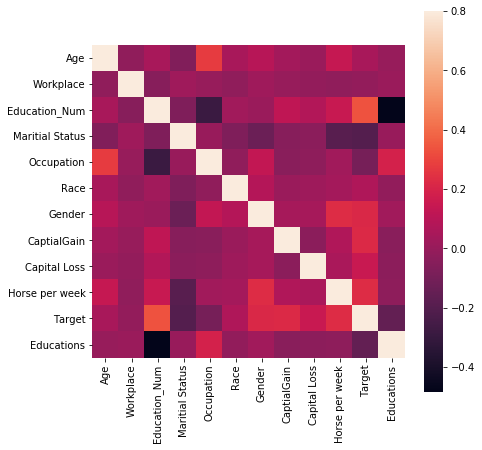

In [55]:
corrmat = original_data.corr()
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

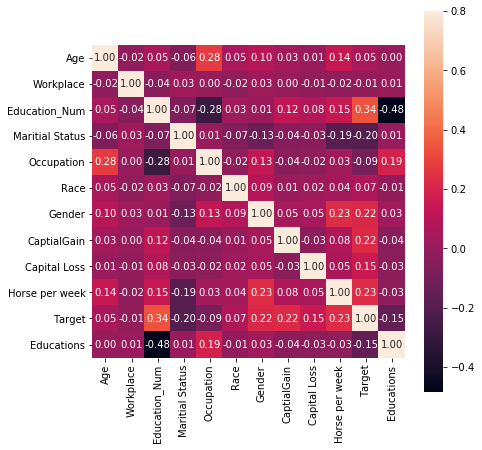

In [56]:
corrmat = original_data.corr()
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.2f')
#sns.heatmap(annot=True)
plt.show()

In [57]:
#Adding the reasting features
X = original_data[['Education_Num','Occupation','Age','Gender']]
y = original_data['Target']

In [58]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
score = model.score(X_test,Y_test)

In [61]:
print(score)

0.7896514662981728


In [72]:
#seting the kernel to Radial Basic Function with penalty parameter C = 1.0 to 10
model = SVC(kernel='rbf',C=7)
model.fit(X_train,Y_train)
score = model.score(X_test,Y_test)
print(score)

0.7937970213419315


0.7937970213419315
